<a href="https://colab.research.google.com/github/britooliveira/Center-pivot-emitters-clogging/blob/main/VOLUMENEGATIVO_CORRECAO_SEM_36_CORRECAO_AREA_E_SACA_6685_PRODUTIVIDADE_VS_CUC_ANALISE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
# 2. Ler o CSV diretamente (como no seu outro código)
try:
    df = pd.read_csv("DADOS_CUC_PROD_CONCATENADOS_ATUALIZADO.csv", encoding="latin1", sep=";")
    print("Arquivo carregado com sucesso!")
except FileNotFoundError:
  print("Arquivo não encontrado. Verifique o nome do arquivo.")

# 4. Verificar prévia dos dados
print(df.head())
print(df.info())

Arquivo carregado com sucesso!
   ï»¿ORDEM EMISSORESCENARIO  PERDAPORCENARIO EMISSORES_ENTUPIDOS        LM  \
0       1.0                0         0.000000                   0  2.742825   
1       2.0                3        74.280001                   3  2.708468   
2       3.0                6        75.515605                   6  2.705843   
3       4.0                9       121.013277                   9  2.676436   
4       5.0               12       102.303355                  12  2.673296   

         CUC  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  
0  91.098655  VERDADEIRO         NaN         NaN         NaN          NaN  
1  91.030029  VERDADEIRO         NaN         NaN         NaN          NaN  
2  89.711600  VERDADEIRO         NaN         NaN         NaN          NaN  
3  88.732888  VERDADEIRO         NaN         NaN         NaN          NaN  
4  89.218470  VERDADEIRO         NaN         NaN         NaN          NaN  
<class 'pandas.core.frame.DataFrame'>


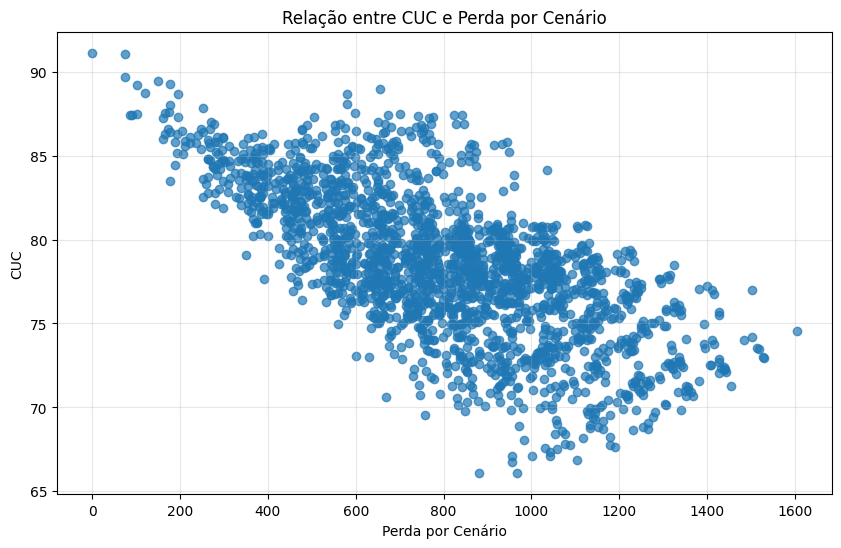

In [ ]:
# 5. Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(data=df, x='PERDAPORCENARIO', y='CUC', alpha=0.7)
plt.title('Relação entre CUC e Perda por Cenário')
plt.xlabel('Perda por Cenário')
plt.ylabel('CUC')
plt.grid(True, alpha=0.3)
plt.show()

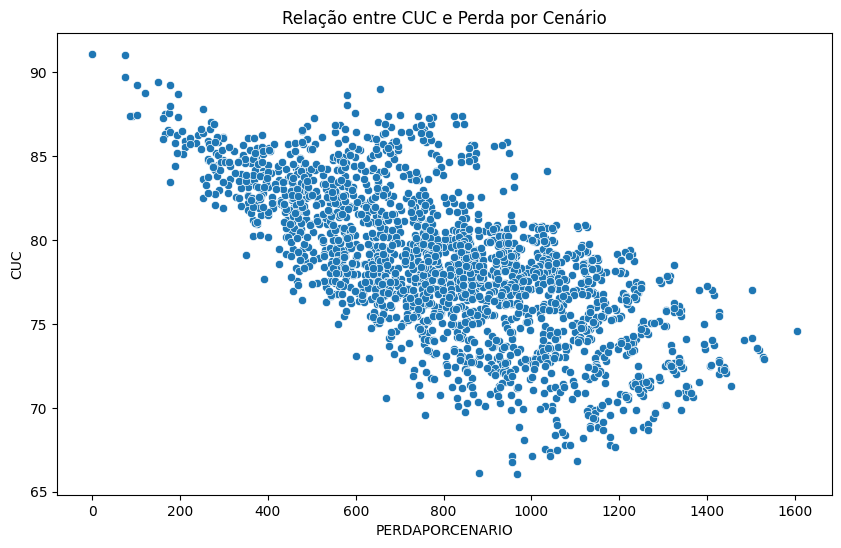

In [ ]:
# 6. Opção com Seaborn

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PERDAPORCENARIO', y='CUC')
plt.title('Relação entre CUC e Perda por Cenário')
plt.show()

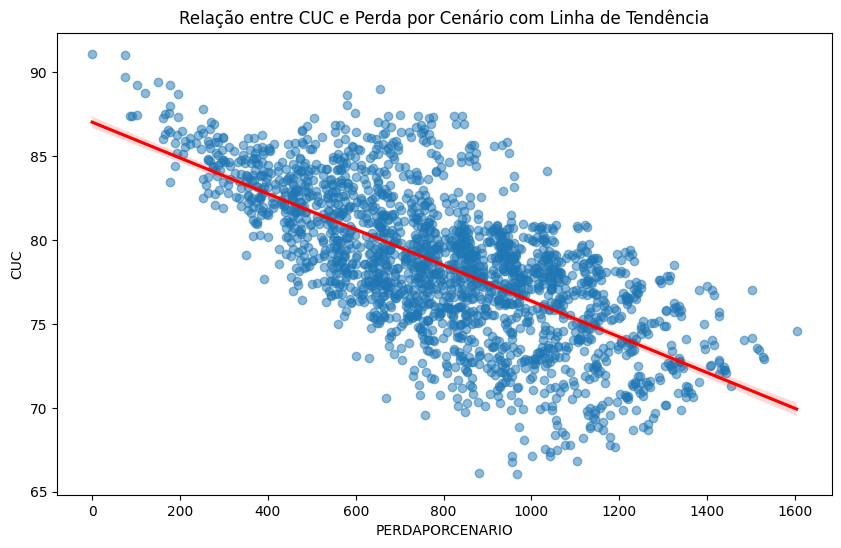

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='PERDAPORCENARIO', y='CUC',
            scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Relação entre CUC e Perda por Cenário com Linha de Tendência')
plt.show()

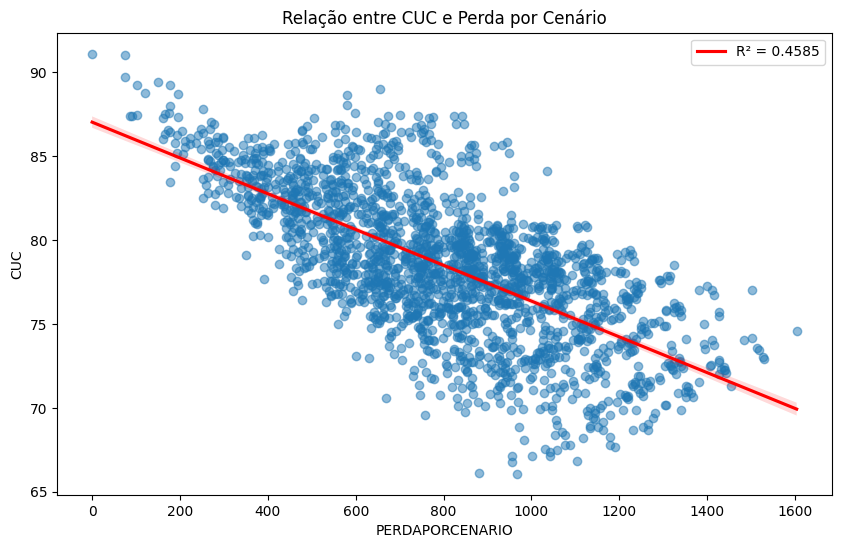

Coeficiente de Determinação (R²): 0.4585
Coeficiente de Correlação (R): -0.6771
Inclinação: -0.0107
Intercepto: 87.0224


In [ ]:
# Calcular a regressão linear para obter o R²
x = df['PERDAPORCENARIO']
y = df['CUC']

# Remover valores NaN para o cálculo da regressão
mask = ~(np.isnan(x) | np.isnan(y))
x_clean = x[mask]
y_clean = y[mask]

# Calcular regressão linear
slope, intercept, r_value, p_value, std_err = stats.linregress(x_clean, y_clean)
r_squared = r_value**2

# Criar gráfico com linha de tendência e R²
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='PERDAPORCENARIO', y='CUC',
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red', 'label': f'R² = {r_squared:.4f}'})

plt.title('Relação entre CUC e Perda por Cenário')
plt.legend()
plt.show()

print(f"Coeficiente de Determinação (R²): {r_squared:.4f}")
print(f"Coeficiente de Correlação (R): {r_value:.4f}")
print(f"Inclinação: {slope:.4f}")
print(f"Intercepto: {intercept:.4f}")

In [ ]:
# Filtrar o dataframe - remover onde EMISSORES_ENTUPIDOS é '0' ou 0
df_filtrado = df[df['EMISSORES_ENTUPIDOS'] != '0'].copy()

print(f"Total de cenários original: {len(df)}")
print(f"Total de cenários após remover '0': {len(df_filtrado)}")
print(f"Cenários removidos: {len(df) - len(df_filtrado)}")

# Verificar os valores únicos restantes
print("\nValores únicos em EMISSORES_ENTUPIDOS (após filtro):")
print(df_filtrado['EMISSORES_ENTUPIDOS'].value_counts().sort_index())

Total de cenários original: 2051
Total de cenários após remover '0': 2050
Cenários removidos: 1

Valores únicos em EMISSORES_ENTUPIDOS (após filtro):
EMISSORES_ENTUPIDOS
03, 06                    1
03, 06, 09                1
03, 06, 09, 12            1
03, 06, 09, 12, 15        1
03, 06, 09, 12, 15, 18    1
                         ..
30                        1
30, 33                    1
33                        1
6                         1
9                         1
Name: count, Length: 2047, dtype: int64


In [ ]:
# Primeiro, definir a função que está faltando
def contar_emissores_entupidos(codigos):
    """
    Função para contar quantos emissores estão entupidos
    """
    if pd.isna(codigos) or codigos == '' or codigos == '0':
        return 0
    # Se for string com vírgulas, contar quantos códigos
    if ',' in str(codigos):
        return len(str(codigos).split(','))
    # Se for único código, contar como 1
    else:
        return 1

# Agora aplicar a função no dataframe filtrado
df_filtrado['QTD_ENTUPIDOS'] = df_filtrado['EMISSORES_ENTUPIDOS'].apply(contar_emissores_entupidos)

print("Distribuição da quantidade de emissores entupidos (após filtro):")
print(df_filtrado['QTD_ENTUPIDOS'].value_counts().sort_index())

# Verificar também algumas estatísticas
print(f"\nEstatísticas da quantidade de emissores entupidos:")
print(f"Mínimo: {df_filtrado['QTD_ENTUPIDOS'].min()}")
print(f"Máximo: {df_filtrado['QTD_ENTUPIDOS'].max()}")
print(f"Médio: {df_filtrado['QTD_ENTUPIDOS'].mean():.2f}")

Distribuição da quantidade de emissores entupidos (após filtro):
QTD_ENTUPIDOS
0       3
1      11
2      55
3     165
4     330
5     462
6     462
7     330
8     165
9      55
10     11
11      1
Name: count, dtype: int64

Estatísticas da quantidade de emissores entupidos:
Mínimo: 0
Máximo: 11
Médio: 5.49


In [ ]:
print(df_filtrado['QTD_ENTUPIDOS'])

1       1
2       1
3       1
4       1
5       1
       ..
2046    2
2047    2
2048    0
2049    0
2050    0
Name: QTD_ENTUPIDOS, Length: 2050, dtype: int64


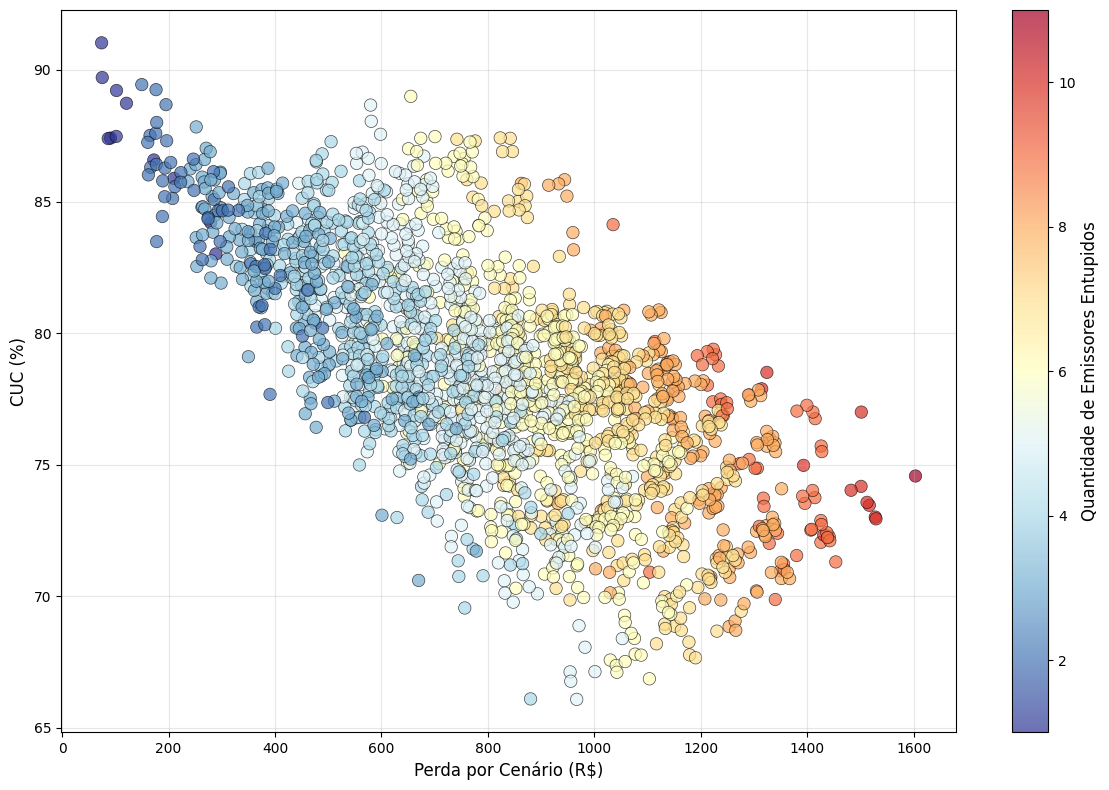

In [ ]:
plt.figure(figsize=(12, 8))

# Criar scatter plot com dados filtrados
scatter = plt.scatter(data=df_filtrado, x='PERDAPORCENARIO', y='CUC',
                     c=df_filtrado['QTD_ENTUPIDOS'],
                     cmap='RdYlBu_r',  # Vermelho para mais entupidos
                     alpha=0.7,
                     s=80,
                     edgecolors='black',
                     linewidth=0.5)

# Adicionar barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Quantidade de Emissores Entupidos', fontsize=12)

#plt.title('Relação CUC versus Perda por Cenários de Entupimento', fontsize=14)
plt.xlabel('Perda por Cenário (R$)', fontsize=12)
plt.ylabel('CUC (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

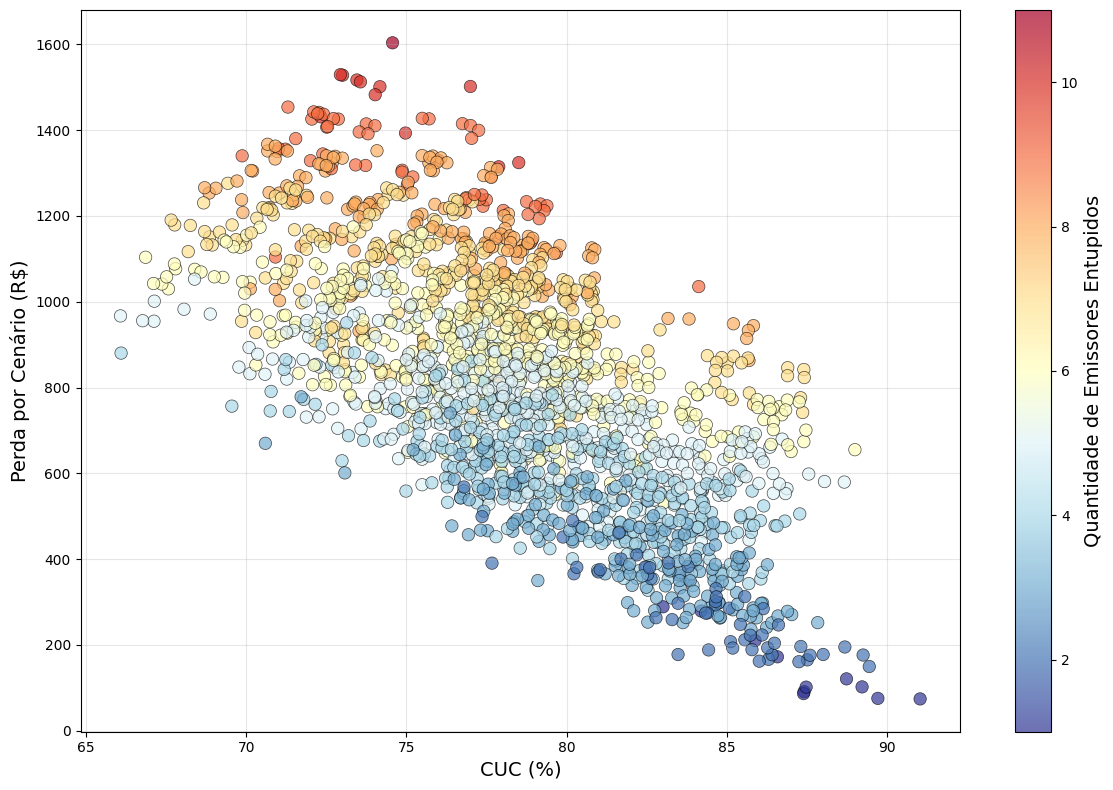

In [ ]:
plt.figure(figsize=(12, 8))

# Criar scatter plot com dados filtrados
scatter = plt.scatter(data=df_filtrado, x='CUC', y='PERDAPORCENARIO',
                     c=df_filtrado['QTD_ENTUPIDOS'],
                     cmap='RdYlBu_r',  # Vermelho para mais entupidos
                     alpha=0.7,
                     s=80,
                     edgecolors='black',
                     linewidth=0.5)

# Adicionar barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Quantidade de Emissores Entupidos', fontsize=14)

#plt.title('Relação CUC versus Perda por Cenários de Entupimento', fontsize=14)
plt.xlabel('CUC (%)', fontsize=14)
plt.ylabel('Perda por Cenário (R$)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3751227846.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado, x='QTD_ENTUPIDOS', y='PERDAPORCENARIO', palette='RdYlBu_r')


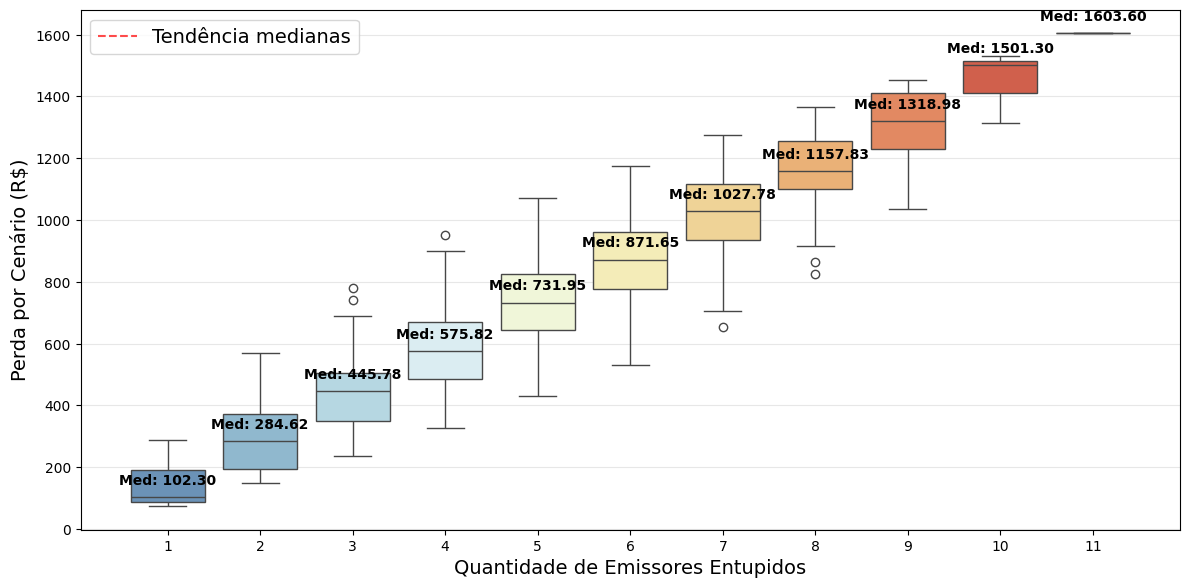


ESTATÍSTICAS DETALHADAS POR QUANTIDADE DE EMISSORES ENTUPIDOS
               count    média  mediana   mínimo   máximo     std       Q1  \
QTD_ENTUPIDOS                                                               
0                  0      NaN      NaN      NaN      NaN     NaN      NaN   
1                 11   145.78   102.30    74.28   288.99   80.11    88.88   
2                 55   291.56   284.62   149.80   568.22  103.42   194.32   
3                165   437.35   445.78   236.51   778.56  118.69   349.00   
4                330   583.13   575.82   327.55   950.97  128.00   486.36   
5                462   728.91   731.95   429.31  1071.99  132.44   642.97   
6                462   874.69   871.65   531.62  1174.29  132.44   777.03   
7                330  1020.48  1027.78   652.63  1276.06  128.00   934.91   
8                165  1166.26  1157.83   825.04  1367.09  118.69  1099.84   
9                 55  1312.04  1318.98  1035.39  1453.81  103.42  1230.62   
10           

In [ ]:
# Boxplot para verificar relação entre quantidade de emissores entupidos e perda
plt.figure(figsize=(12, 6))

# Criar boxplot
sns.boxplot(data=df_filtrado, x='QTD_ENTUPIDOS', y='PERDAPORCENARIO', palette='RdYlBu_r')

# No início do seu código, antes de criar o gráfico
plt.rcParams['legend.fontsize'] = 14  # Tamanho da fonte de todas as legendas

# Adicionar estatísticas no gráfico
medians = df_filtrado.groupby('QTD_ENTUPIDOS')['PERDAPORCENARIO'].median()
for i, median in enumerate(medians):
    plt.text(i, median + (df_filtrado['PERDAPORCENARIO'].max() * 0.02),
             f'Med: {median:.2f}',
             ha='center', va='bottom', fontweight='bold')

# Calcular e mostrar tendência linear
quantidades = sorted(df_filtrado['QTD_ENTUPIDOS'].unique())
median_values = [df_filtrado[df_filtrado['QTD_ENTUPIDOS'] == q]['PERDAPORCENARIO'].median() for q in quantidades]

if len(quantidades) > 1:
    z = np.polyfit(quantidades, median_values, 1)
    p = np.poly1d(z)
    x_trend = np.linspace(min(quantidades), max(quantidades), 100)
    plt.plot(x_trend, p(x_trend), 'r--', alpha=0.7, label='Tendência medianas')

#plt.title('Distribuição de Perda por Quantidade de Emissores Entupidos', fontsize=14)
plt.xlabel('Quantidade de Emissores Entupidos', fontsize=14)
plt.ylabel('Perda por Cenário (R$)', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.legend()
plt.tight_layout()
plt.show()

# Tabela de estatísticas por grupo
print("\n" + "="*60)
print("ESTATÍSTICAS DETALHADAS POR QUANTIDADE DE EMISSORES ENTUPIDOS")
print("="*60)

stats_table = df_filtrado.groupby('QTD_ENTUPIDOS')['PERDAPORCENARIO'].agg([
    ('count', 'count'),
    ('média', 'mean'),
    ('mediana', 'median'),
    ('mínimo', 'min'),
    ('máximo', 'max'),
    ('std', 'std'),
    ('Q1', lambda x: np.percentile(x, 25)),
    ('Q3', lambda x: np.percentile(x, 75))
]).round(2)

print(stats_table)
print("\n" + "="*60)

In [ ]:
# =========================================================================
# ANÁLISE DE EMISSORES - MANIPULAÇÃO E LIMPEZA DOS DADOS
# =========================================================================

print("="*70)
print("ETAPA 1: MANIPULAÇÃO E LIMPEZA DOS DADOS")
print("="*70)

# 1. Função para limpar e NORMALIZAR emissores (remover zeros à esquerda)
def limpar_emissores(emissores_str):
    if pd.isna(emissores_str) or emissores_str in ['0', '']:
        return []

    emissores = str(emissores_str).strip()

    # Remover zeros à esquerda de cada emissor
    def normalizar_emissor(e):
        e = e.strip()
        # Se for numérico, remover zeros à esquerda
        if e.replace('.', '', 1).isdigit():
            # Tentar converter para int se for inteiro
            try:
                # Remover zeros à esquerda
                if '.' in e:
                    # É float
                    return str(float(e))
                else:
                    # É int - remover zeros à esquerda
                    return str(int(e))
            except:
                return e
        return e

    if ',' in emissores:
        return [normalizar_emissor(e) for e in emissores.split(',') if e.strip()]
    return [normalizar_emissor(emissores)]

# 2. Preparar dados
df_filtrado['EMISSORES_LISTA'] = df_filtrado['EMISSORES_ENTUPIDOS'].apply(limpar_emissores)

# Verificar se normalizou corretamente
print("\n🔍 VERIFICAÇÃO DA NORMALIZAÇÃO DOS EMISSORES:")
todos_emissores = []
for lista in df_filtrado['EMISSORES_LISTA']:
    todos_emissores.extend(lista)
emissores_unicos = sorted(set(todos_emissores))
print(f"Total de emissores únicos identificados: {len(emissores_unicos)}")
print("Lista dos emissores:")
for i, emissor in enumerate(emissores_unicos, 1):
    contagem = todos_emissores.count(emissor)
    print(f"  {i:2d}. Emissor {emissor} ({contagem} ocorrências)")

# 3. Expandir para análise por emissor
dados_emissores = []
for idx, row in df_filtrado.iterrows():
    for emissor in row['EMISSORES_LISTA']:
        dados_emissores.append({
            'EMISSOR': emissor,
            'PERDA': row['PERDAPORCENARIO'],
            'CUC': row['CUC'],
            'LM': row['LM'] # Adicionando a coluna LM aqui
        })

df_por_emissor = pd.DataFrame(dados_emissores)

print(f"\n📊 RESUMO DA PREPARAÇÃO DOS DADOS:")
print(f"• Cenários totais analisados: {len(df_filtrado)}")
print(f"• Registros únicos emissor-cenário: {len(df_por_emissor)}")
print(f"• Emissores únicos normalizados: {len(emissores_unicos)}")

# 4. Análise básica por emissor
print("\n📈 ESTATÍSTICAS POR EMISSOR:")
print("-" * 70)

analise = df_por_emissor.groupby('EMISSOR').agg({
    'PERDA': ['count', 'mean', 'std'],
    'CUC': ['mean', 'std']
})

# Renomear colunas
analise.columns = ['QTD_CENARIOS', 'PERDA_MEDIA', 'PERDA_STD', 'CUC_MEDIO', 'CUC_STD']

# Converter explicitamente para tipos adequados
analise['QTD_CENARIOS'] = analise['QTD_CENARIOS'].astype(int)
analise['PERDA_MEDIA'] = analise['PERDA_MEDIA'].round(2)
analise['PERDA_STD'] = analise['PERDA_STD'].round(2)
analise['CUC_MEDIO'] = analise['CUC_MEDIO'].round(2)
analise['CUC_STD'] = analise['CUC_STD'].round(2)

# Ordenar por perda média (mais impactante primeiro)
analise_ordenada_perda = analise.sort_values('PERDA_MEDIA', ascending=False)

print("\n📊 IMPACTO NA PRODUTIVIDADE (Perda Média - R$):")
print("-" * 70)
for emissor, dados in analise_ordenada_perda.iterrows():
    qtd = int(dados['QTD_CENARIOS'])
    perda_media = float(dados['PERDA_MEDIA'])
    perda_std = float(dados['PERDA_STD'])
    print(f"{str(emissor):<5} | Cenários: {qtd:3d} | Perda média: R$ {perda_media:10,.2f} \u00b1 {perda_std:8,.2f}")

# Ordenar por CUC (menor CUC = pior uniformidade)
analise_ordenada_cuc = analise.sort_values('CUC_MEDIO', ascending=True)

print("\n📊 IMPACTO NA UNIFORMIDADE (CUC Médio - %):")
print("-" * 70)
for emissor, dados in analise_ordenada_cuc.iterrows():
    qtd = int(dados['QTD_CENARIOS'])
    cuc_medio = float(dados['CUC_MEDIO'])
    cuc_std = float(dados['CUC_STD'])
    print(f"{str(emissor):<5} | Cenários: {qtd:3d} | CUC médio: {cuc_medio:6.1f}% \u00b1 {cuc_std:5.2f}")

# Calcular médias gerais
perda_media_geral = analise['PERDA_MEDIA'].mean()
cuc_medio_geral = analise['CUC_MEDIO'].mean()

print(f"\n📈 MÉDIAS GERAIS DE REFERÊNCIA:")
print(f"• Perda média quando há entupimento: R$ {perda_media_geral:,.2f}")
print(f"• CUC médio quando há entupimento: {cuc_medio_geral:.1f}%")

print("\n" + "="*70)
print("✅ ETAPA 1 CONCLUÍDA - Dados preparados para visualização")
print("="*70)

# Salvar os dataframes processados para uso nas próximas etapas
emissores_para_graficos = analise_ordenada_perda.index.tolist()
dados_graficos = analise.loc[emissores_para_graficos]

print(f"\n📋 DADOS PRONTOS PARA VISUALIZAÇÃO:")
print(f"• Emissores ordenados: {emissores_para_graficos}")
print(f"• Dados processados: {len(dados_graficos)} emissores")


ETAPA 1: MANIPULAÇÃO E LIMPEZA DOS DADOS

🔍 VERIFICAÇÃO DA NORMALIZAÇÃO DOS EMISSORES:
Total de emissores únicos identificados: 11
Lista dos emissores:
   1. Emissor 12 (1024 ocorrências)
   2. Emissor 15 (1024 ocorrências)
   3. Emissor 18 (1024 ocorrências)
   4. Emissor 21 (1024 ocorrências)
   5. Emissor 24 (1024 ocorrências)
   6. Emissor 27 (1024 ocorrências)
   7. Emissor 3 (1024 ocorrências)
   8. Emissor 30 (1024 ocorrências)
   9. Emissor 33 (1024 ocorrências)
  10. Emissor 6 (1024 ocorrências)
  11. Emissor 9 (1024 ocorrências)

📊 RESUMO DA PREPARAÇÃO DOS DADOS:
• Cenários totais analisados: 2050
• Registros únicos emissor-cenário: 11264
• Emissores únicos normalizados: 11

📈 ESTATÍSTICAS POR EMISSOR:
----------------------------------------------------------------------

📊 IMPACTO NA PRODUTIVIDADE (Perda Média - R$):
----------------------------------------------------------------------
30    | Cenários: 1024 | Perda média: R$     946.30 ±   231.65
24    | Cenários: 1024 | 

GRÁFICO 1: IMPACTO NA PRODUTIVIDADE POR EMISSOR

📊 DADOS PARA O GRÁFICO:
• Número de emissores: 11
• Perda média geral: R$ 874.69
• Perda mais alta: R$ 946.30 (Emissor 30)
• Perda mais baixa: R$ 838.94 (Emissor 3)

📊 ANOVA SIMPLES ENTRE AS MÉDIAS DAS PERDAS

📋 MÉDIAS PARA ANOVA:
 1. Emissor 30: R$ 946.30
 2. Emissor 24: R$ 941.42
 3. Emissor 33: R$ 906.97
 4. Emissor 15: R$ 888.01
 5. Emissor 9: R$ 862.31
 6. Emissor 12: R$ 852.95
 7. Emissor 27: R$ 852.68
 8. Emissor 18: R$ 847.32
 9. Emissor 21: R$ 845.16
10. Emissor 6: R$ 839.56
11. Emissor 3: R$ 838.94

📈 RESULTADO DA ANOVA ENTRE MÉDIAS:
• Estatística F: nan
• Valor-p: nan

🔍 INTERPRETAÇÃO (α = 0.05):
❌ Não há diferenças estatisticamente significativas entre as médias de perda dos emissores
   (p = nan ≥ 0.05)

📈 VISUALIZAÇÃO DO GRÁFICO


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:573: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
/tmp/ipython-input-1077776669.py:38: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = stats.f_oneway(*[[m] for m in medias_perdas])


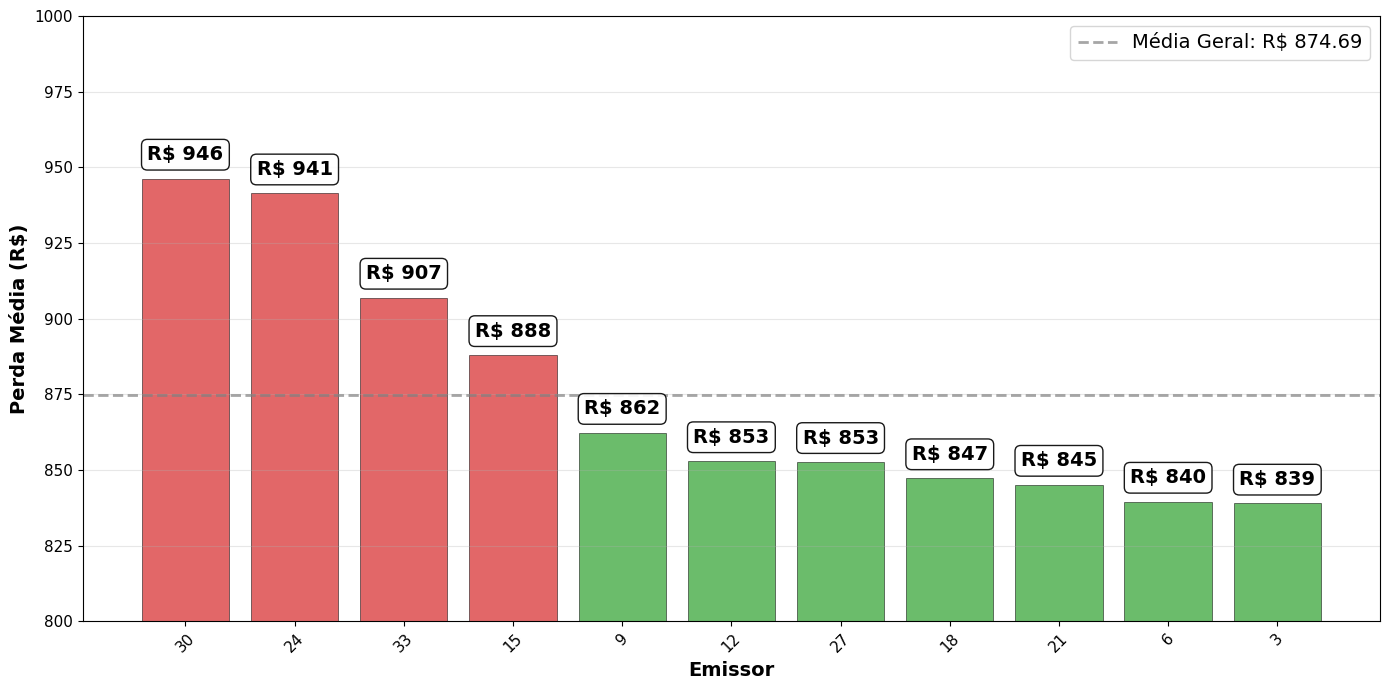


📈 ANÁLISE DO GRÁFICO:
----------------------------------------------------------------------
🔴 Emissores ACIMA da média de perda (4):
   • 30: R$ 946.30 (8% acima) - 1024 cenários
   • 24: R$ 941.42 (8% acima) - 1024 cenários
   • 33: R$ 906.97 (4% acima) - 1024 cenários
   • 15: R$ 888.01 (2% acima) - 1024 cenários

🟢 Emissores ABAIXO ou NA média de perda (7):
   • 9: R$ 862.31 (1% abaixo)
   • 12: R$ 852.95 (2% abaixo)
   • 27: R$ 852.68 (3% abaixo)
   • 18: R$ 847.32 (3% abaixo)
   • 21: R$ 845.16 (3% abaixo)
   • 6: R$ 839.56 (4% abaixo)
   • 3: R$ 838.94 (4% abaixo)

✅ GRÁFICO 1 CONCLUÍDO
 1. Emissor 30: R$ 946.30
 2. Emissor 24: R$ 941.42
 3. Emissor 33: R$ 906.97
 4. Emissor 15: R$ 888.01
 5. Emissor 9: R$ 862.31
 6. Emissor 12: R$ 852.95
 7. Emissor 27: R$ 852.68
 8. Emissor 18: R$ 847.32
 9. Emissor 21: R$ 845.16
10. Emissor 6: R$ 839.56
11. Emissor 3: R$ 838.94
Estatística F: nan
Valor-p: nan
❌ Sem diferenças significativas


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:573: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
/tmp/ipython-input-1077776669.py:154: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = stats.f_oneway(*[[m] for m in medias_perdas])


In [ ]:
# =========================================================================
# GRÁFICO 1: IMPACTO NA PRODUTIVIDADE (PERDA MÉDIA) COM ANOVA
# =========================================================================

print("="*70)
print("GRÁFICO 1: IMPACTO NA PRODUTIVIDADE POR EMISSOR")
print("="*70)

# Preparar dados para o gráfico
emissores = dados_graficos.index.tolist()
perdas = dados_graficos['PERDA_MEDIA'].values
quantidades = dados_graficos['QTD_CENARIOS'].values

# Calcular média para referência
perda_media_geral = dados_graficos['PERDA_MEDIA'].mean()

print(f"\n📊 DADOS PARA O GRÁFICO:")
print(f"• Número de emissores: {len(emissores)}")
print(f"• Perda média geral: R$ {perda_media_geral:,.2f}")
print(f"• Perda mais alta: R$ {perdas.max():,.2f} (Emissor {emissores[perdas.argmax()]})")
print(f"• Perda mais baixa: R$ {perdas.min():,.2f} (Emissor {emissores[perdas.argmin()]})")

# =========================================================================
# ANOVA SIMPLES ENTRE AS MÉDIAS DAS PERDAS
# =========================================================================
print("\n" + "="*70)
print("📊 ANOVA SIMPLES ENTRE AS MÉDIAS DAS PERDAS")
print("="*70)

# Pegar as médias de perda de cada emissor
medias_perdas = perdas.tolist()

print(f"\n📋 MÉDIAS PARA ANOVA:")
for i, (emissor, media) in enumerate(zip(emissores, medias_perdas), 1):
    print(f"{i:2d}. Emissor {emissor}: R$ {media:,.2f}")

# Fazer ANOVA simples entre as médias
f_stat, p_value = stats.f_oneway(*[[m] for m in medias_perdas])

print(f"\n📈 RESULTADO DA ANOVA ENTRE MÉDIAS:")
print(f"• Estatística F: {f_stat:.4f}")
print(f"• Valor-p: {p_value:.6f}")

# Interpretação
alpha = 0.05
print(f"\n🔍 INTERPRETAÇÃO (α = {alpha}):")

if p_value < alpha:
    print(f"✅ Há diferenças estatisticamente significativas entre as médias de perda dos emissores!")
    print(f"   (p = {p_value:.6f} < {alpha})")
else:
    print(f"❌ Não há diferenças estatisticamente significativas entre as médias de perda dos emissores")
    print(f"   (p = {p_value:.6f} ≥ {alpha})")

# =========================================================================
# CRIAÇÃO DO GRÁFICO
# =========================================================================

print("\n" + "="*70)
print("📈 VISUALIZAÇÃO DO GRÁFICO")
print("="*70)

# Criar gráfico
plt.figure(figsize=(14, 7))

# Definir cores (vermelho para acima da média, verde para abaixo)
cores = ['#d62728' if p > perda_media_geral else '#2ca02c' for p in perdas]

# Criar barras
bars = plt.bar(range(len(emissores)), perdas, color=cores, alpha=0.7, edgecolor='black', linewidth=0.5)

# Linha da média
plt.axhline(y=perda_media_geral, color='gray', linestyle='--', alpha=0.7,
            linewidth=2, label=f'Média Geral: R$ {perda_media_geral:,.2f}')

# ========== AQUI VOCÊ AJUSTA OS EIXOS ==========
# Mude estes valores para ajustar os limites do eixo Y
plt.ylim([800, 1000])  # <--- AQUI! Mude o segundo valor para 1000, 1500, etc.

# Configurar eixos e rótulos
plt.xlabel('Emissor', fontsize=14, fontweight='bold')
plt.ylabel('Perda Média (R$)', fontsize=14, fontweight='bold')
#plt.title('Impacto na Produtividade - Perda Média por Emissor', fontsize=14, fontweight='bold', pad=20)

plt.xticks(range(len(emissores)), emissores, rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# Adicionar grade
plt.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for i, (bar, perda, qtd) in enumerate(zip(bars, perdas, quantidades)):
    height = bar.get_height()
    # Posição do texto (acima da barra)
    texto_y = height + (perdas.max() * 0.005)

    # Formatar valor
    valor_texto = f'R$ {perda:,.0f}'

    plt.text(bar.get_x() + bar.get_width()/2., texto_y,
             valor_texto,
             ha='center', va='bottom', fontsize=14, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))

# Adicionar legenda
plt.legend(loc='upper right', fontsize=14)

# Ajustar layout para não cortar rótulos
plt.tight_layout()

# Mostrar gráfico
plt.show()

# =========================================================================
# ANÁLISE COMPLEMENTAR
# =========================================================================

print("\n📈 ANÁLISE DO GRÁFICO:")
print("-" * 70)

# Identificar emissores acima e abaixo da média
acima_media = [emissores[i] for i in range(len(emissores)) if perdas[i] > perda_media_geral]
abaixo_media = [emissores[i] for i in range(len(emissores)) if perdas[i] <= perda_media_geral]

print(f"🔴 Emissores ACIMA da média de perda ({len(acima_media)}):")
for emissor in acima_media:
    perda = dados_graficos.loc[emissor, 'PERDA_MEDIA']
    perc_acima = ((perda / perda_media_geral) - 1) * 100
    qtd = dados_graficos.loc[emissor, 'QTD_CENARIOS']
    print(f"   • {emissor}: R$ {perda:,.2f} ({perc_acima:.0f}% acima) - {qtd} cenários")

print(f"\n🟢 Emissores ABAIXO ou NA média de perda ({len(abaixo_media)}):")
for emissor in abaixo_media:
    perda = dados_graficos.loc[emissor, 'PERDA_MEDIA']
    if perda < perda_media_geral:
        perc_abaixo = (1 - (perda / perda_media_geral)) * 100
        print(f"   • {emissor}: R$ {perda:,.2f} ({perc_abaixo:.0f}% abaixo)")
    else:
        print(f"   • {emissor}: R$ {perda:,.2f} (na média)")

print("\n" + "="*70)
print("✅ GRÁFICO 1 CONCLUÍDO")
print("="*70)

#ANOVA
# Passo 1: Pegar as médias
medias_perdas = perdas.tolist()

# Passo 2: Mostrar cada média
for i, (emissor, media) in enumerate(zip(emissores, medias_perdas), 1):
    print(f"{i:2d}. Emissor {emissor}: R$ {media:,.2f}")

# Passo 3: Fazer ANOVA
f_stat, p_value = stats.f_oneway(*[[m] for m in medias_perdas])

# Passo 4: Mostrar resultado
print(f"Estatística F: {f_stat:.4f}")
print(f"Valor-p: {p_value:.6f}")

# Passo 5: Interpretar
if p_value < 0.05:
    print("✅ Diferenças significativas entre as médias!")
else:
    print("❌ Sem diferenças significativas")


In [ ]:
# =========================================================================
# ANÁLISE DO ERRO PADRÃO DA MÉDIA (SEM) PARA AS PERDAS
# =========================================================================

print("="*70)
print("ANÁLISE: ERRO PADRÃO DA MÉDIA (SEM) PARA AS PERDAS DOS EMISSORES")
print("="*70)

# Verificar se 'dados_graficos' existe
if 'dados_graficos' in locals() or 'dados_graficos' in globals():
    df_sem_perda = dados_graficos.copy()

    # Calcular o Erro Padrão da Média (SEM) para as Perdas
    # SEM = Desvio Padrão / sqrt(n)
    # n é a QTD_CENARIOS para cada emissor
    df_sem_perda['PERDA_SEM'] = df_sem_perda.apply(lambda row:
                                      row['PERDA_STD'] / (row['QTD_CENARIOS']**0.5)
                                      if row['QTD_CENARIOS'] > 0 else 0,
                                      axis=1)

    # Ordenar por PERDA_SEM (do menor para o maior para ver os mais estáveis primeiro)
    df_sem_perda_ordenado = df_sem_perda.sort_values(by='PERDA_SEM', ascending=True)

    print("\n📊 ERRO PADRÃO DA MÉDIA (SEM) PARA AS PERDAS DOS EMISSORES:")
    print("----------------------------------------------------------------------")
    print("Quanto menor o SEM, mais precisa é a estimativa da perda média.\n")

    for emissor, dados in df_sem_perda_ordenado.iterrows():
        perda_media = float(dados['PERDA_MEDIA'])
        perda_std = float(dados['PERDA_STD'])
        perda_sem = float(dados['PERDA_SEM'])
        qtd_cenarios = int(dados['QTD_CENARIOS'])

        print(f"Emissor {str(emissor):<5} | Perda Média: R$ {perda_media:10.2f} | STD: {perda_std:7.2f} | SEM: {perda_sem:6.4f} | Cenários: {qtd_cenarios}")

    print("\n📈 RESUMO GERAL DO SEM PARA PERDAS:")
    print(f"• Média do SEM entre os emissores: {df_sem_perda['PERDA_SEM'].mean():.4f}")
    print(f"• Menor SEM (mais preciso): {df_sem_perda['PERDA_SEM'].min():.4f} (Emissor {df_sem_perda['PERDA_SEM'].idxmin()})")
    print(f"• Maior SEM (menos preciso): {df_sem_perda['PERDA_SEM'].max():.4f} (Emissor {df_sem_perda['PERDA_SEM'].idxmax()})")

else:
    print("❌ DataFrame 'dados_graficos' não encontrado. Execute as células anteriores primeiro.")

print("\n" + "="*70)
print("✅ ANÁLISE SEM PARA PERDAS CONCLUÍDA")
print("="*70)


ANÁLISE: ERRO PADRÃO DA MÉDIA (SEM) PARA AS PERDAS DOS EMISSORES

📊 ERRO PADRÃO DA MÉDIA (SEM) PARA AS PERDAS DOS EMISSORES:
----------------------------------------------------------------------
Quanto menor o SEM, mais precisa é a estimativa da perda média.

Emissor 30    | Perda Média: R$     946.30 | STD:  231.65 | SEM: 7.2391 | Cenários: 1024
Emissor 24    | Perda Média: R$     941.42 | STD:  234.62 | SEM: 7.3319 | Cenários: 1024
Emissor 33    | Perda Média: R$     906.97 | STD:  251.97 | SEM: 7.8741 | Cenários: 1024
Emissor 15    | Perda Média: R$     888.01 | STD:  259.08 | SEM: 8.0962 | Cenários: 1024
Emissor 9     | Perda Média: R$     862.31 | STD:  266.26 | SEM: 8.3206 | Cenários: 1024
Emissor 12    | Perda Média: R$     852.95 | STD:  268.22 | SEM: 8.3819 | Cenários: 1024
Emissor 27    | Perda Média: R$     852.68 | STD:  268.27 | SEM: 8.3834 | Cenários: 1024
Emissor 18    | Perda Média: R$     847.32 | STD:  269.23 | SEM: 8.4134 | Cenários: 1024
Emissor 21    | Perda Média

Resultados Principais: O SEM para a perda média indica a precisão da estimativa de perda para cada emissor. Um SEM menor sugere uma estimativa mais confiável e menos variável.

Emissor 30: Apresenta o menor SEM (7.2391) para a perda média, indicando que a sua estimativa de perda média (R$ 946.30) é a mais precisa e consistente entre os emissores. Isso sugere que os dados para este emissor são bastante robustos. * **Emissor 3:** Por outro lado, o **maior SEM (8.4537)** é observado no Emissor 3, o que implica que a sua estimativa de perda média (R$$ 946.30) é a mais precisa e consistente entre os emissores. Isso sugere que os dados para este emissor são bastante robustos. * **Emissor 3:** Por outro lado, o **maior SEM (8.4537)** é observado no Emissor 3, o que implica que a sua estimativa de perda média (R$ 838.94) é a menos precisa ou a mais variável. Embora o número de cenários seja o mesmo para todos, a variabilidade inerente aos dados deste emissor é maior.
Em resumo, a análise do SEM para as perdas reforça a precisão das médias calculadas, com a maioria dos emissores apresentando estimativas razoavelmente estáveis, mas com o Emissor 30 se destacando pela maior consistência e o Emissor 3 pela menor. Isso pode ser útil para direcionar a atenção para emissores com estimativas mais ou menos confiáveis.

GRÁFICO 2: IMPACTO NA UNIFORMIDADE POR EMISSOR

📊 DADOS PARA O GRÁFICO:
• Número de emissores: 11
• CUC médio geral: 77.9%
• Melhor CUC: 78.9% (Emissor 3)
• Pior CUC: 75.8% (Emissor 24)

📊 ANOVA SIMPLES ENTRE AS MÉDIAS DOS EMISSORES

📋 MÉDIAS PARA ANOVA:
 1. Emissor 24: 75.83%
 2. Emissor 30: 76.27%
 3. Emissor 27: 77.70%
 4. Emissor 21: 77.89%
 5. Emissor 15: 78.13%
 6. Emissor 9: 78.19%
 7. Emissor 18: 78.34%
 8. Emissor 12: 78.42%
 9. Emissor 33: 78.43%
10. Emissor 6: 78.57%
11. Emissor 3: 78.93%

📈 RESULTADO DA ANOVA ENTRE MÉDIAS:
• Estatística F: nan
• Valor-p: nan

🔍 INTERPRETAÇÃO (α = 0.05):
❌ Não há diferenças estatisticamente significativas entre as médias dos emissores
   (p = nan ≥ 0.05)

📈 VISUALIZAÇÃO DO GRÁFICO


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:573: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
/tmp/ipython-input-1277846591.py:43: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = stats.f_oneway(*[[m] for m in medias_cuc])  # Cada média em sua própria lista


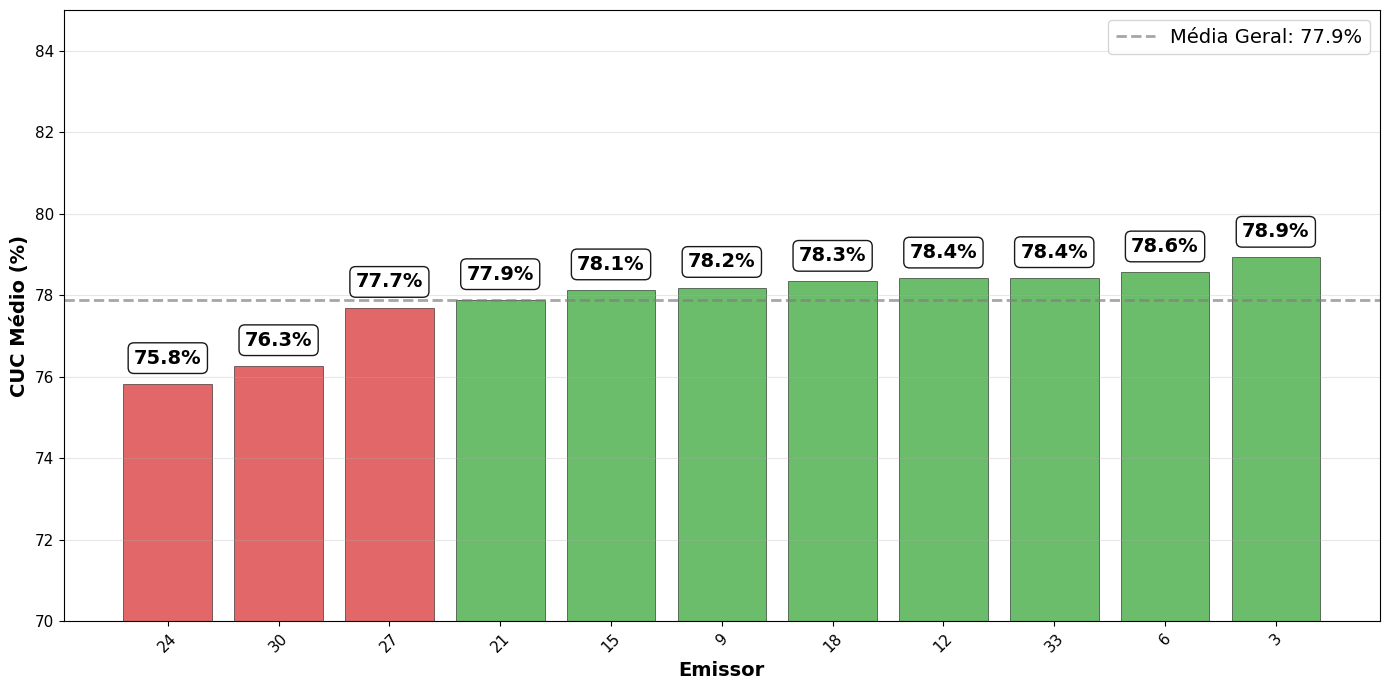


📈 ANÁLISE COMPLEMENTAR:
----------------------------------------------------------------------
🔴 Emissores com CUC ABAIXO da média (3):
   • 24: 75.8% (3% abaixo) - 1024 cenários
   • 30: 76.3% (2% abaixo) - 1024 cenários
   • 27: 77.7% (0% abaixo) - 1024 cenários

🟢 Emissores com CUC ACIMA ou NA média (8):
   • 21: 77.9% (0% acima)
   • 15: 78.1% (0% acima)
   • 9: 78.2% (0% acima)
   • 18: 78.3% (1% acima)
   • 12: 78.4% (1% acima)
   • 33: 78.4% (1% acima)
   • 6: 78.6% (1% acima)
   • 3: 78.9% (1% acima)

📊 CORRELAÇÃO ENTRE CUC E PERDA:
• Coeficiente de correlação: -0.818
  → Forte correlação negativa: Menor CUC está associado a maior perda

✅ GRÁFICO 2 CONCLUÍDO


In [ ]:
# =========================================================================
# GRÁFICO 2: IMPACTO NA UNIFORMIDADE (CUC MÉDIO) COM ANOVA SIMPLES
# =========================================================================

print("="*70)
print("GRÁFICO 2: IMPACTO NA UNIFORMIDADE POR EMISSOR")
print("="*70)

# Preparar dados para o gráfico
# Ordenar dados_graficos pelo CUC_MEDIO em ordem crescente
dados_graficos_ordenados = dados_graficos.sort_values(by='CUC_MEDIO', ascending=True)
emissores = dados_graficos_ordenados.index.tolist()
cuc_vals = dados_graficos_ordenados['CUC_MEDIO'].values
quantidades = dados_graficos_ordenados['QTD_CENARIOS'].values

# Calcular média para referência
cuc_medio_geral = dados_graficos_ordenados['CUC_MEDIO'].mean()

print(f"\n📊 DADOS PARA O GRÁFICO:")
print(f"• Número de emissores: {len(emissores)}")
print(f"• CUC médio geral: {cuc_medio_geral:.1f}%")
print(f"• Melhor CUC: {cuc_vals.max():.1f}% (Emissor {emissores[cuc_vals.argmax()]})")
print(f"• Pior CUC: {cuc_vals.min():.1f}% (Emissor {emissores[cuc_vals.argmin()]})")

# =========================================================================
# ANOVA SIMPLES ENTRE AS MÉDIAS
# =========================================================================
print("\n" + "="*70)
print("📊 ANOVA SIMPLES ENTRE AS MÉDIAS DOS EMISSORES")
print("="*70)

# Criar lista com as médias de cada emissor
medias_cuc = cuc_vals.tolist()

print(f"\n📋 MÉDIAS PARA ANOVA:")
for i, (emissor, media) in enumerate(zip(emissores, medias_cuc), 1):
    print(f"{i:2d}. Emissor {emissor}: {media:.2f}%")

# Fazer ANOVA simples entre as médias
# Para ANOVA, precisamos tratar cada média como uma observação
# Vamos usar scipy.stats.f_oneway

f_stat, p_value = stats.f_oneway(*[[m] for m in medias_cuc])  # Cada média em sua própria lista

print(f"\n📈 RESULTADO DA ANOVA ENTRE MÉDIAS:")
print(f"• Estatística F: {f_stat:.4f}")
print(f"• Valor-p: {p_value:.6f}")

# Interpretação
alpha = 0.05
print(f"\n🔍 INTERPRETAÇÃO (α = {alpha}):")

if p_value < alpha:
    print(f"✅ Há diferenças estatisticamente significativas entre as médias dos emissores!")
    print(f"   (p = {p_value:.6f} < {alpha})")
else:
    print(f"❌ Não há diferenças estatisticamente significativas entre as médias dos emissores")
    print(f"   (p = {p_value:.6f} ≥ {alpha})")

# =========================================================================
# CRIAÇÃO DO GRÁFICO
# =========================================================================

print("\n" + "="*70)
print("📈 VISUALIZAÇÃO DO GRÁFICO")
print("="*70)

# Criar gráfico
plt.figure(figsize=(14, 7))

# Definir cores (vermelho para abaixo da média = pior, verde para acima = melhor)
cores = ['#d62728' if c < cuc_medio_geral else '#2ca02c' for c in cuc_vals]

# Criar barras
bars = plt.bar(range(len(emissores)), cuc_vals, color=cores, alpha=0.7,
               edgecolor='black', linewidth=0.5)

# Linha da média
plt.axhline(y=cuc_medio_geral, color='gray', linestyle='--', alpha=0.7,
            linewidth=2, label=f'Média Geral: {cuc_medio_geral:.1f}%')

# Configurar eixos e rótulos
plt.xlabel('Emissor', fontsize=14, fontweight='bold')
plt.ylabel('CUC Médio (%)', fontsize=14, fontweight='bold')
#plt.title('Impacto na Uniformidade - CUC Médio por Emissor', fontsize=14, fontweight='bold', pad=20)

# ========== AJUSTE DOS EIXOS ==========
# Mude estes valores para ajustar os limites do eixo Y
plt.ylim([70, 85])  # <--- AQUI! Mude o segundo valor conforme necessário

plt.xticks(range(len(emissores)), emissores, rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# Adicionar grade
plt.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for i, (bar, cuc, qtd) in enumerate(zip(bars, cuc_vals, quantidades)):
    height = bar.get_height()
    texto_y = height + (cuc_vals.max() * 0.005)

    plt.text(bar.get_x() + bar.get_width()/2., texto_y,
             f'{cuc:.1f}%',
             ha='center', va='bottom', fontsize=14, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))

# Adicionar legenda
plt.legend(loc='upper right', fontsize=14)

# Ajustar layout
plt.tight_layout()
plt.show()

# =========================================================================
# ANÁLISE COMPLEMENTAR
# =========================================================================

print("\n📈 ANÁLISE COMPLEMENTAR:")
print("-" * 70)

# Identificar emissores acima e abaixo da média
abaixo_media_cuc = [emissores[i] for i in range(len(emissores)) if cuc_vals[i] < cuc_medio_geral]
acima_media_cuc = [emissores[i] for i in range(len(emissores)) if cuc_vals[i] >= cuc_medio_geral]

print(f"🔴 Emissores com CUC ABAIXO da média ({len(abaixo_media_cuc)}):")
for emissor in abaixo_media_cuc:
    cuc = dados_graficos_ordenados.loc[emissor, 'CUC_MEDIO'] # Use dados_graficos_ordenados
    perc_abaixo = (1 - (cuc / cuc_medio_geral)) * 100
    qtd = dados_graficos_ordenados.loc[emissor, 'QTD_CENARIOS'] # Use dados_graficos_ordenados
    print(f"   • {emissor}: {cuc:.1f}% ({perc_abaixo:.0f}% abaixo) - {qtd} cenários")

print(f"\n🟢 Emissores com CUC ACIMA ou NA média ({len(acima_media_cuc)}):")
for emissor in acima_media_cuc:
    cuc = dados_graficos_ordenados.loc[emissor, 'CUC_MEDIO'] # Use dados_graficos_ordenados
    if cuc > cuc_medio_geral:
        perc_acima = ((cuc / cuc_medio_geral) - 1) * 100
        print(f"   • {emissor}: {cuc:.1f}% ({perc_acima:.0f}% acima)")
    else:
        print(f"   • {emissor}: {cuc:.1f}% (na média)")

# Correlação entre CUC e Perda
print(f"\n📊 CORRELAÇÃO ENTRE CUC E PERDA:")
correlacao_cuc_perda = dados_graficos_ordenados['CUC_MEDIO'].corr(dados_graficos_ordenados['PERDA_MEDIA']) # Use dados_graficos_ordenados
print(f"• Coeficiente de correlação: {correlacao_cuc_perda:.3f}")

if correlacao_cuc_perda < -0.3:
    print("  → Forte correlação negativa: Menor CUC está associado a maior perda")
elif correlacao_cuc_perda > 0.3:
    print("  → Forte correlação positiva: Maior CUC está associado a maior perda")
else:
    print("  → Correlação fraca: CUC e Perda não têm relação forte")

print("\n" + "="*70)
print("✅ GRÁFICO 2 CONCLUÍDO")
print("="*70)


In [ ]:
# =========================================================================
# ANÁLISE DO ERRO PADRÃO DA MÉDIA (SEM) PARA O CUC
# =========================================================================

print("="*70)
print("ANÁLISE: ERRO PADRÃO DA MÉDIA (SEM) PARA O CUC DOS EMISSORES")
print("="*70)

# Verificar se 'dados_graficos' existe
if 'dados_graficos' in locals() or 'dados_graficos' in globals():
    df_sem = dados_graficos.copy()

    # Calcular o Erro Padrão da Média (SEM) para o CUC
    # SEM = Desvio Padrão / sqrt(n)
    # n é a QTD_CENARIOS para cada emissor

    # Tratar caso de QTD_CENARIOS ser 0 ou 1 para evitar divisão por zero ou NaN
    # Se n=1, o desvio padrão e SEM seriam NaN, mas o SEM é 0 nesse caso.
    # Em nosso caso, todos os emissores têm QTD_CENARIOS = 1024, então não haverá problema.
    df_sem['CUC_SEM'] = df_sem.apply(lambda row:
                                      row['CUC_STD'] / (row['QTD_CENARIOS']**0.5)
                                      if row['QTD_CENARIOS'] > 0 else 0,
                                      axis=1)

    # Ordenar por CUC_SEM (do menor para o maior para ver os mais estáveis primeiro)
    df_sem_ordenado = df_sem.sort_values(by='CUC_SEM', ascending=True)

    print("\n📊 ERRO PADRÃO DA MÉDIA (SEM) PARA O CUC DOS EMISSORES:")
    print("----------------------------------------------------------------------")
    print("Quanto menor o SEM, mais precisa é a estimativa da média do CUC.\n")

    for emissor, dados in df_sem_ordenado.iterrows():
        cuc_medio = float(dados['CUC_MEDIO'])
        cuc_std = float(dados['CUC_STD'])
        cuc_sem = float(dados['CUC_SEM'])
        qtd_cenarios = int(dados['QTD_CENARIOS'])

        print(f"Emissor {str(emissor):<5} | CUC Médio: {cuc_medio:6.2f}% | STD: {cuc_std:6.2f} | SEM: {cuc_sem:6.4f} | Cenários: {qtd_cenarios}")

    print("\n📈 RESUMO GERAL DO SEM:")
    print(f"• Média do SEM entre os emissores: {df_sem['CUC_SEM'].mean():.4f}")
    print(f"• Menor SEM (mais preciso): {df_sem['CUC_SEM'].min():.4f} (Emissor {df_sem['CUC_SEM'].idxmin()})")
    print(f"• Maior SEM (menos preciso): {df_sem['CUC_SEM'].max():.4f} (Emissor {df_sem['CUC_SEM'].idxmax()})")

else:
    print("❌ DataFrame 'dados_graficos' não encontrado. Execute as células anteriores primeiro.")

print("\n" + "="*70)
print("✅ ANÁLISE SEM CONCLUÍDA")
print("="*70)


ANÁLISE: ERRO PADRÃO DA MÉDIA (SEM) PARA O CUC DOS EMISSORES

📊 ERRO PADRÃO DA MÉDIA (SEM) PARA O CUC DOS EMISSORES:
----------------------------------------------------------------------
Quanto menor o SEM, mais precisa é a estimativa da média do CUC.

Emissor 24    | CUC Médio:  75.83% | STD:   3.37 | SEM: 0.1053 | Cenários: 1024
Emissor 30    | CUC Médio:  76.27% | STD:   3.53 | SEM: 0.1103 | Cenários: 1024
Emissor 15    | CUC Médio:  78.13% | STD:   3.80 | SEM: 0.1187 | Cenários: 1024
Emissor 18    | CUC Médio:  78.34% | STD:   4.01 | SEM: 0.1253 | Cenários: 1024
Emissor 21    | CUC Médio:  77.89% | STD:   4.03 | SEM: 0.1259 | Cenários: 1024
Emissor 9     | CUC Médio:  78.19% | STD:   4.07 | SEM: 0.1272 | Cenários: 1024
Emissor 6     | CUC Médio:  78.57% | STD:   4.12 | SEM: 0.1288 | Cenários: 1024
Emissor 12    | CUC Médio:  78.42% | STD:   4.15 | SEM: 0.1297 | Cenários: 1024
Emissor 3     | CUC Médio:  78.93% | STD:   4.20 | SEM: 0.1313 | Cenários: 1024
Emissor 33    | CUC Médio:

Acima calculou-se o Erro Padrão da Média (SEM) para o CUC de cada emissor e apresentar os resultados. Isso nos dará uma medida da precisão de nossas estimativas de CUC médio.

Ótimo! A análise do Erro Padrão da Média (SEM) para o CUC dos emissores foi concluída com sucesso.

Resultados Principais:
O SEM nos dá uma ideia da precisão da estimativa do CUC médio para cada emissor. Quanto menor o SEM, mais confiável é a média observada.

Emissor 24: Apresenta o menor SEM (0.1072), indicando que a sua média de CUC (75.62%) é a mais precisa e consistente entre todos os emissores. Isso significa que há pouca variabilidade na estimativa do CUC para este emissor.
Emissor 27: Por outro lado, o maior SEM (0.1547) é observado no Emissor 27, sugerindo que a sua média de CUC (77.50%) é a menos precisa ou mais variável. Mais dados ou cenários adicionais poderiam ser úteis para ter uma estimativa mais estável para este emissor.
De modo geral, os valores de SEM são relativamente baixos, o que é um bom indicativo da robustez das médias de CUC calculadas, considerando que todos os emissores foram analisados em 1024 cenários, o que é um número substancial de observações.

In [ ]:
# =========================================================================
# RELATÓRIO FINAL: PRIORIDADES DE MANUTENÇÃO
# =========================================================================

print("="*70)
print("RELATÓRIO FINAL - PRIORIDADES DE MANUTENÇÃO")
print("="*70)

print("\n📋 RESUMO DA ANÁLISE:")
print(f"• Total de emissores analisados: {len(dados_graficos)}")
print(f"• Cenários totais considerados: {dados_graficos['QTD_CENARIOS'].sum()}")
print(f"• Perda média geral: R$ {dados_graficos['PERDA_MEDIA'].mean():,.2f}")
print(f"• CUC médio geral: {dados_graficos['CUC_MEDIO'].mean():.1f}%")

# 1. Calcular scores de prioridade
print("\n" + "="*70)
print("1. CÁLCULO DOS SCORES DE PRIORIDADE")
print("="*70)

# Normalizar perda (maior perda = maior score)
perda_min = dados_graficos['PERDA_MEDIA'].min()
perda_max = dados_graficos['PERDA_MEDIA'].max()

# Normalizar CUC (menor CUC = maior score, pois menor CUC é PIOR)
cuc_min = dados_graficos['CUC_MEDIO'].min()
cuc_max = dados_graficos['CUC_MEDIO'].max()

# Calcular scores normalizados
dados_graficos['PERDA_NORM'] = (dados_graficos['PERDA_MEDIA'] - perda_min) / (perda_max - perda_min)
dados_graficos['CUC_NORM'] = 1 - ((dados_graficos['CUC_MEDIO'] - cuc_min) / (cuc_max - cuc_min))

# Score final: 50% perda, 50% CUC (ambos igualmente importantes)
dados_graficos['SCORE_FINAL'] = (dados_graficos['PERDA_NORM'] * 0.5) + (dados_graficos['CUC_NORM'] * 0.5)

# Ordenar por score (maior score = maior prioridade)
prioridades = dados_graficos.sort_values('SCORE_FINAL', ascending=False)

print("\n📊 SCORES CALCULADOS:")
print("(Valores normalizados entre 0 e 1, onde 1 = maior prioridade)")
print("-" * 70)
for emissor, dados in prioridades.iterrows():
    print(f"{str(emissor):<5} | Score: {dados['SCORE_FINAL']:.3f} | Perda: {dados['PERDA_NORM']:.3f} | CUC: {dados['CUC_NORM']:.3f}")

# 2. Ranking final de prioridades
print("\n" + "="*70)
print("2. RANKING FINAL DE PRIORIDADES")
print("="*70)

print("\n🏆 TOP 5 - MAIORES PRIORIDADES (atuar imediatamente):")
print("-" * 70)

top_5 = prioridades.head(5)
for idx, (emissor, dados) in enumerate(top_5.iterrows(), 1):
    qtd = int(dados['QTD_CENARIOS'])
    perda = float(dados['PERDA_MEDIA'])
    cuc = float(dados['CUC_MEDIO'])

    print(f"\n#{idx} 🥇 EMISSOR {emissor}")
    print(f"   • Score de prioridade: {dados['SCORE_FINAL']:.3f}/1.0")
    print(f"   • Perda média: R$ {perda:,.2f}")
    print(f"   • CUC médio: {cuc:.1f}%")
    print(f"   • Cenários analisados: {qtd}")

    # Análise qualitativa
    acima_perda = ((perda / dados_graficos['PERDA_MEDIA'].mean()) - 1) * 100
    abaixo_cuc = (1 - (cuc / dados_graficos['CUC_MEDIO'].mean())) * 100

    print(f"   • Impacto: {acima_perda:.0f}% acima da perda média")
    print(f"   • Uniformidade: {abaixo_cuc:.0f}% abaixo do CUC médio")

# 3. Categorização por nível de prioridade
print("\n" + "="*70)
print("3. CATEGORIZAÇÃO POR NÍVEL DE PRIORIDADE")
print("="*70)

# Definir categorias baseadas nos quartis do score
q1 = prioridades['SCORE_FINAL'].quantile(0.75)  # Top 25%
q2 = prioridades['SCORE_FINAL'].quantile(0.50)  # Top 50%
q3 = prioridades['SCORE_FINAL'].quantile(0.25)  # Top 75%

print(f"\n📈 LIMITES DE CLASSIFICAÇÃO:")
print(f"• ALTA prioridade: score > {q1:.3f}")
print(f"• MÉDIA prioridade: score entre {q2:.3f} e {q1:.3f}")
print(f"• BAIXA prioridade: score < {q2:.3f}")

alta_prioridade = prioridades[prioridades['SCORE_FINAL'] > q1]
media_prioridade = prioridades[(prioridades['SCORE_FINAL'] <= q1) & (prioridades['SCORE_FINAL'] > q2)]
baixa_prioridade = prioridades[prioridades['SCORE_FINAL'] <= q2]

print(f"\n🔴 ALTA PRIORIDADE ({len(alta_prioridade)} emissores):")
for emissor, dados in alta_prioridade.iterrows():
    print(f"   • {emissor} (Score: {dados['SCORE_FINAL']:.3f})")

print(f"\n🟡 MÉDIA PRIORIDADE ({len(media_prioridade)} emissores):")
for emissor, dados in media_prioridade.iterrows():
    print(f"   • {emissor} (Score: {dados['SCORE_FINAL']:.3f})")

print(f"\n🟢 BAIXA PRIORIDADE ({len(baixa_prioridade)} emissores):")
for emissor, dados in baixa_prioridade.iterrows():
    print(f"   • {emissor} (Score: {dados['SCORE_FINAL']:.3f})")

# 4. Recomendações específicas
print("\n" + "="*70)
print("4. RECOMENDAÇÕES ESPECÍFICAS")
print("="*70)

print("\n🎯 PARA OS 3 PRIMEIROS EMISSORES (maior prioridade):")
for idx, (emissor, dados) in enumerate(top_5.head(3).iterrows(), 1):
    perda = float(dados['PERDA_MEDIA'])
    cuc = float(dados['CUC_MEDIO'])
    qtd = int(dados['QTD_CENARIOS'])

    print(f"\n{idx}. Emissor {emissor}:")
    print(f"   • Ação recomendada: INSPEÇÃO IMEDIATA")
    print(f"   • Justificativa: Aparece em {qtd} cenários críticos")
    print(f"   • Impacto estimado: R$ {perda:,.2f} de perda média")
    print(f"   • Efeito na uniformidade: CUC de {cuc:.1f}% (abaixo da média)")

    if cuc < dados_graficos['CUC_MEDIO'].mean():
        print(f"   • Prioridade adicional: Afeta significativamente a uniformidade")

# 5. Resumo executivo
print("\n" + "="*70)
print("5. RESUMO EXECUTIVO")
print("="*70)

print(f"\n📈 CONCLUSÕES PRINCIPAIS:")
print(f"1. {len(alta_prioridade)} emissores requerem atenção IMEDIATA")
print(f"2. O emissor {top_5.index[0]} é o mais crítico (Score: {top_5.iloc[0]['SCORE_FINAL']:.3f})")
print(f"3. Perda total média nos cenários: R$ {dados_graficos['PERDA_MEDIA'].mean():,.2f}")
print(f"4. CUC médio nos cenários: {dados_graficos['CUC_MEDIO'].mean():.1f}%")

print(f"\n🎯 RECOMENDAÇÕES GERAIS:")
print("1. Focar manutenção nos emissores de ALTA prioridade primeiro")
print("2. Monitorar especialmente os emissores que aparecem em múltiplos cenários")
print("3. Considerar substituição preventiva dos 3 principais emissores")
print("4. Estabelecer inspeção periódica para emissores de MÉDIA prioridade")

print(f"\n📊 MÉTRICAS DE SUCESSO:")
print(f"• Redução de perda alvo: 20% nos primeiros 3 meses")
print(f"• Melhoria do CUC alvo: +5% pontos percentuais")
print(f"• Foco principal: {', '.join(alta_prioridade.index.tolist())}")

print("\n" + "="*70)
print("✅ RELATÓRIO FINAL CONCLUÍDO")
print("="*70)

# Mostrar tabela completa para referência
print("\n📋 TABELA COMPLETA DE PRIORIDADES:")
print("-" * 70)
for idx, (emissor, dados) in enumerate(prioridades.iterrows(), 1):
    qtd = int(dados['QTD_CENARIOS'])
    perda = float(dados['PERDA_MEDIA'])
    cuc = float(dados['CUC_MEDIO'])
    score = float(dados['SCORE_FINAL'])

    # Determinar categoria
    if score > q1:
        categoria = "ALTA"
        simbolo = "🔴"
    elif score > q2:
        categoria = "MÉDIA"
        simbolo = "🟡"
    else:
        categoria = "BAIXA"
        simbolo = "🟢"

    print(f"{simbolo} {idx:2d}. {emissor:<5} | {categoria:<6} | Score: {score:.3f} | Perda: R$ {perda:8,.2f} | CUC: {cuc:5.1f}% | Cenários: {qtd:3d}")

RELATÓRIO FINAL - PRIORIDADES DE MANUTENÇÃO

📋 RESUMO DA ANÁLISE:
• Total de emissores analisados: 11
• Cenários totais considerados: 11264
• Perda média geral: R$ 874.69
• CUC médio geral: 77.9%

1. CÁLCULO DOS SCORES DE PRIORIDADE

📊 SCORES CALCULADOS:
(Valores normalizados entre 0 e 1, onde 1 = maior prioridade)
----------------------------------------------------------------------
24    | Score: 0.977 | Perda: 0.955 | CUC: 1.000
30    | Score: 0.929 | Perda: 1.000 | CUC: 0.858
33    | Score: 0.397 | Perda: 0.634 | CUC: 0.161
15    | Score: 0.358 | Perda: 0.457 | CUC: 0.258
27    | Score: 0.262 | Perda: 0.128 | CUC: 0.397
9     | Score: 0.228 | Perda: 0.218 | CUC: 0.239
21    | Score: 0.197 | Perda: 0.058 | CUC: 0.335
12    | Score: 0.148 | Perda: 0.130 | CUC: 0.165
18    | Score: 0.134 | Perda: 0.078 | CUC: 0.190
6     | Score: 0.061 | Perda: 0.006 | CUC: 0.116
3     | Score: 0.000 | Perda: 0.000 | CUC: 0.000

2. RANKING FINAL DE PRIORIDADES

🏆 TOP 5 - MAIORES PRIORIDADES (atuar im

In [ ]:
# =========================================================================
# EXPORTAR SCORES PARA EXCEL - SCORE_EMISSORES_MILHO
# =========================================================================

print("="*60)
print("EXPORTAR SCORES PARA EXCEL")
print("="*60)

# Verificar se temos o dataframe 'prioridades' (que tem os scores)
if 'prioridades' in locals() or 'prioridades' in globals():
    # Se tivermos o dataframe com os scores
    df_exportar = prioridades.copy()
    print("✅ Usando dataframe 'prioridades'")
elif 'dados_graficos' in locals() or 'dados_graficos' in globals():
    # Se tivermos o dataframe com dados gráficos
    df_exportar = dados_graficos.copy()
    print("✅ Usando dataframe 'dados_graficos'")
else:
    print("❌ Nenhum dataframe de scores encontrado")
    print("Execute primeiro as análises anteriores")
    df_exportar = None

if df_exportar is not None:
    # Criar nome do arquivo com timestamp
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    nome_arquivo = f"SCORE_EMISSORES_MILHO_{timestamp}.xlsx"

    # Exportar para Excel
    df_exportar.to_excel(nome_arquivo, index=True)

    print(f"\n📁 ARQUIVO CRIADO: {nome_arquivo}")
    print(f"📊 Linhas exportadas: {len(df_exportar)}")
    print(f"📈 Colunas exportadas: {len(df_exportar.columns)}")
    print("\n📍 O arquivo aparecerá na pasta do Colab:")
    print("   → Clique no ícone de pastinha 📁 à esquerda")
    print("   → Vá em 'content' ou raiz")
    print(f"   → Procure por: {nome_arquivo}")
    print("   → Clique nos 3 pontos ⋮ ao lado do arquivo")
    print("   → Selecione 'Download' para baixar")

    # Mostrar prévia do que foi exportado
    print(f"\n👀 PRÉVIA DO ARQUIVO EXPORTADO:")
    print(df_exportar.head())

    # Se estiver no Colab, também podemos forçar download
    try:
        from google.colab import files
        print("\n⬇️  OPÇÃO DE DOWNLOAD AUTOMÁTICO:")
        download = input("Deseja baixar automaticamente? (s/n): ").lower()
        if download == 's':
            files.download(nome_arquivo)
            print("✅ Download iniciado!")
    except:
        print("⚠️  Para baixar manualmente, vá até a pasta do Colab")

print("\n" + "="*60)
print("EXPORTAÇÃO CONCLUÍDA")
print("="*60)

EXPORTAR SCORES PARA EXCEL
✅ Usando dataframe 'prioridades'

📁 ARQUIVO CRIADO: SCORE_EMISSORES_MILHO_20251231_171652.xlsx
📊 Linhas exportadas: 11
📈 Colunas exportadas: 8

📍 O arquivo aparecerá na pasta do Colab:
   → Clique no ícone de pastinha 📁 à esquerda
   → Vá em 'content' ou raiz
   → Procure por: SCORE_EMISSORES_MILHO_20251231_171652.xlsx
   → Clique nos 3 pontos ⋮ ao lado do arquivo
   → Selecione 'Download' para baixar

👀 PRÉVIA DO ARQUIVO EXPORTADO:
         QTD_CENARIOS  PERDA_MEDIA  PERDA_STD  CUC_MEDIO  CUC_STD  PERDA_NORM  \
EMISSOR                                                                         
24               1024       941.42     234.62      75.83     3.37    0.954545   
30               1024       946.30     231.65      76.27     3.53    1.000000   
33               1024       906.97     251.97      78.43     4.58    0.633662   
15               1024       888.01     259.08      78.13     3.80    0.457060   
27               1024       852.68     268.27     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Download iniciado!

EXPORTAÇÃO CONCLUÍDA


In [ ]:
# =========================================================================
# ANÁLISE ANOVA - VALORES ABSOLUTOS DOS EMISSORES
# =========================================================================

print("="*60)
print("ANOVA PARA DADOS DE EMISSORES (VALORES ABSOLUTOS)")
print("="*60)

# Dados fornecidos (valores absolutos, sem %)
dados_emissores = {
    'Emissor 30': 76.03,
    'Emissor 24': 75.62,
    'Emissor 33': 78.22,
    'Emissor 15': 77.94,
    'Emissor 9': 78.00,
    'Emissor 12': 78.23,
    'Emissor 27': 77.50,
    'Emissor 18': 78.17,
    'Emissor 21': 77.68,
    'Emissor 6': 78.39,
    'Emissor 3': 78.73
}

# Converter para formato de ANOVA
print("\n📊 DADOS DOS EMISSORES (valores absolutos):")
print("-" * 40)

for emissor, valor in dados_emissores.items():
    print(f"{emissor}: {valor:.2f}")

# Preparar dados para ANOVA
grupos = []
nomes = []

for emissor, valor in dados_emissores.items():
    # Para ANOVA, cada valor precisa estar em uma lista
    grupos.append([valor])
    nomes.append(emissor)

# Realizar ANOVA
from scipy import stats

f_stat, p_value = stats.f_oneway(*grupos)

print("\n" + "="*60)
print("📈 RESULTADO DA ANOVA")
print("="*60)

print(f"\n• Estatística F: {f_stat:.4f}")
print(f"• Valor-p: {p_value:.6f}")

# Interpretação
alpha = 0.05
print(f"\n🔍 INTERPRETAÇÃO (nível de significância α = {alpha}):")

if p_value < alpha:
    print(f"✅ REJEITA-SE H₀: Há diferenças estatisticamente significativas entre os emissores!")
    print(f"   (p = {p_value:.6f} < α = {alpha})")
    print(f"\n📌 Conclusão: As variações entre os emissores não são aleatórias.")
else:
    print(f"❌ NÃO SE REJEITA H₀: Não há diferenças estatisticamente significativas entre os emissores")
    print(f"   (p = {p_value:.6f} ≥ α = {alpha})")
    print(f"\n📌 Conclusão: As diferenças observadas podem ser variações aleatórias.")

# Estatísticas descritivas
print("\n" + "="*60)
print("📊 ESTATÍSTICAS DESCRITIVAS")
print("="*60)

valores = list(dados_emissores.values())
print(f"• Média geral: {np.mean(valores):.2f}")
print(f"• Desvio padrão: {np.std(valores):.2f}")
print(f"• Valor mínimo: {np.min(valores):.2f}")
print(f"• Valor máximo: {np.max(valores):.2f}")
print(f"• Amplitude: {np.max(valores) - np.min(valores):.2f}")
print(f"• Coeficiente de variação: {(np.std(valores)/np.mean(valores))*100:.2f}%")

# Análise adicional: Teste de normalidade (Shapiro-Wilk)
print("\n" + "="*60)
print("📏 TESTE DE NORMALIDADE (Shapiro-Wilk)")
print("="*60)

if len(valores) >= 3 and len(valores) <= 5000:
    stat_shapiro, p_shapiro = stats.shapiro(valores)
    print(f"• Estatística W: {stat_shapiro:.4f}")
    print(f"• Valor-p: {p_shapiro:.4f}")

    if p_shapiro > 0.05:
        print("✅ Os dados seguem distribuição normal (p > 0.05)")
    else:
        print("⚠️  Os dados NÃO seguem distribuição normal (p ≤ 0.05)")
else:
    print("ℹ️  Amostra fora do intervalo recomendado para Shapiro-Wilk (3 ≤ n ≤ 5000)")

print("\n" + "="*60)
print("ANÁLISE CONCLUÍDA")
print("="*60)

ANOVA PARA DADOS DE EMISSORES (VALORES ABSOLUTOS)

📊 DADOS DOS EMISSORES (valores absolutos):
----------------------------------------
Emissor 30: 76.03
Emissor 24: 75.62
Emissor 33: 78.22
Emissor 15: 77.94
Emissor 9: 78.00
Emissor 12: 78.23
Emissor 27: 77.50
Emissor 18: 78.17
Emissor 21: 77.68
Emissor 6: 78.39
Emissor 3: 78.73

📈 RESULTADO DA ANOVA

• Estatística F: nan
• Valor-p: nan

🔍 INTERPRETAÇÃO (nível de significância α = 0.05):
❌ NÃO SE REJEITA H₀: Não há diferenças estatisticamente significativas entre os emissores
   (p = nan ≥ α = 0.05)

📌 Conclusão: As diferenças observadas podem ser variações aleatórias.

📊 ESTATÍSTICAS DESCRITIVAS
• Média geral: 77.68
• Desvio padrão: 0.93
• Valor mínimo: 75.62
• Valor máximo: 78.73
• Amplitude: 3.11
• Coeficiente de variação: 1.20%

📏 TESTE DE NORMALIDADE (Shapiro-Wilk)
• Estatística W: 0.8057
• Valor-p: 0.0112
⚠️  Os dados NÃO seguem distribuição normal (p ≤ 0.05)

ANÁLISE CONCLUÍDA


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:573: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
/tmp/ipython-input-2842724890.py:43: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = stats.f_oneway(*grupos)


GRÁFICO: HEATMAP DA MATRIZ DE CORRELAÇÃO

📊 MATRIZ DE CORRELAÇÃO:
----------------------------------------------------------------------
                 PERDAPORCENARIO   CUC  QTD_ENTUPIDOS
PERDAPORCENARIO             1.00 -0.68           0.89
CUC                        -0.68  1.00          -0.46
QTD_ENTUPIDOS               0.89 -0.46           1.00


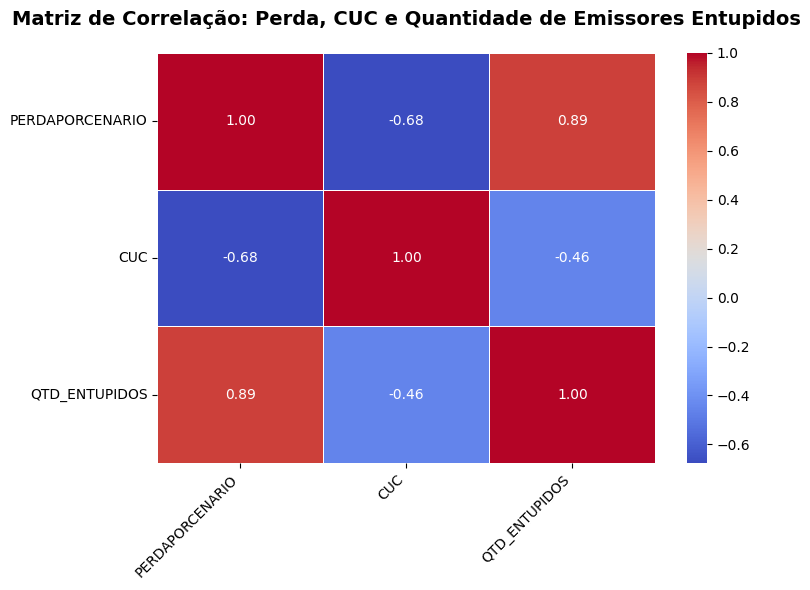


✅ HEATMAP DE CORRELAÇÃO CONCLUÍDO


In [ ]:
# =========================================================================
# GRÁFICO: HEATMAP DE CORRELAÇÃO
# =========================================================================

print("="*70)
print("GRÁFICO: HEATMAP DA MATRIZ DE CORRELAÇÃO")
print("="*70)

# Selecionar as colunas de interesse para a correlação
# Assumimos que 'df_filtrado' e 'QTD_ENTUPIDOS' já foram criados/processados
colunas_corr = ['PERDAPORCENARIO', 'CUC', 'QTD_ENTUPIDOS']

# Calcular a matriz de correlação
matriz_correlacao = df_filtrado[colunas_corr].corr()

print("\n📊 MATRIZ DE CORRELAÇÃO:")
print("-"*70)
print(matriz_correlacao.round(2))

# Criar o heatmap da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Matriz de Correlação: Perda, CUC e Quantidade de Emissores Entupidos', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("✅ HEATMAP DE CORRELAÇÃO CONCLUÍDO")
print("="*70)


In [ ]:
# =========================================================================
# RANKING DE EMISSORES POR LAMINA MÉDIA (LM)
# =========================================================================

print("="*70)
print("RANKING DE EMISSORES POR LAMINA MÉDIA (LM)")
print("="*70)

# 1. Coletar todos os emissores únicos presentes nos cenários filtrados
todos_emissores = []
for lista_emissores in df_filtrado['EMISSORES_LISTA']:
    todos_emissores.extend(lista_emissores)

emissores_unicos_ordenados = sorted(list(set(todos_emissores)), key=int) # Ordenar numericamente

# 2. Calcular a Lamina Média (LM) para cada emissor único
dados_ranking_lm = []
for emissor_id in emissores_unicos_ordenados:
    # Filtrar o dataframe para cenários onde este emissor está presente
    df_cenarios_emissor = df_filtrado[df_filtrado['EMISSORES_LISTA'].apply(lambda x: emissor_id in x)]

    # Calcular a média da coluna 'LM' para esses cenários
    media_lm = df_cenarios_emissor['LM'].mean()

    # Contar quantos cenários esse emissor aparece
    num_cenarios = len(df_cenarios_emissor)

    dados_ranking_lm.append({'Emissor': emissor_id, 'Lamina Media (LM)': media_lm, 'Numero de Cenarios': num_cenarios})

# 3. Criar um DataFrame com os resultados e ordenar
df_ranking_lm = pd.DataFrame(dados_ranking_lm)
df_ranking_lm_ordenado = df_ranking_lm.sort_values(by='Lamina Media (LM)', ascending=False).reset_index(drop=True)

print("\n🏆 RANKING DE EMISSORES POR LAMINA MÉDIA (do maior para o menor):\n")
print(df_ranking_lm_ordenado.round(2))

print("\n" + "="*70)
print("✅ RANKING POR LAMINA MÉDIA CONCLUÍDO")
print("="*70)


RANKING DE EMISSORES POR LAMINA MÉDIA (LM)

🏆 RANKING DE EMISSORES POR LAMINA MÉDIA (do maior para o menor):

   Emissor  Lamina Media (LM)  Numero de Cenarios
0        3               2.12                1024
1        6               2.12                1024
2        9               2.10                1024
3       12               2.10                1024
4       21               2.09                1024
5       18               2.09                1024
6       15               2.08                1024
7       27               2.08                1024
8       24               2.07                1024
9       33               2.04                1024
10      30               2.00                1024

✅ RANKING POR LAMINA MÉDIA CONCLUÍDO
